<a href="https://colab.research.google.com/github/donib-irakihda/fusemachines-ai-fellowship/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
RANDOM_STATE=7

In [2]:
# Adult dataset
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=",\s", header=None, names = column_names, na_values='?')

test = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', sep=",\s", header = None, names = column_names, na_values='?')

test = test.drop([0])
adult = pd.concat([test,train]).reset_index()
adult.drop(columns=['index'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [3]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [4]:
train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
adult.shape

(48842, 15)

In [6]:
adult['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [7]:
adult.income.replace('<=50K.', '<=50K', inplace=True)
adult.income.replace('>50K.', '>50K', inplace=True)
adult.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [8]:
vars_with_na = [var for var in adult.columns if adult[var].isnull().mean() > 0]
vars_with_na

['workclass', 'occupation', 'native-country']

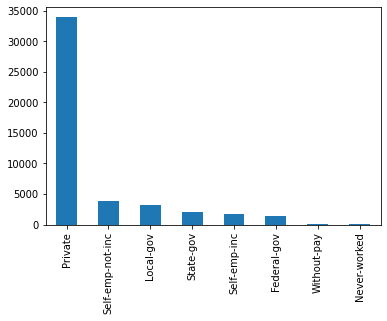

In [9]:
adult['workclass'].value_counts().sort_values(ascending=False).plot.bar()

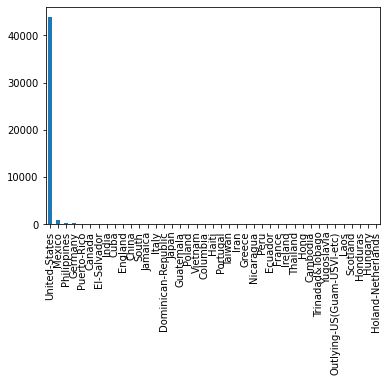

In [10]:
adult['native-country'].value_counts().sort_values(ascending=False).plot.bar()

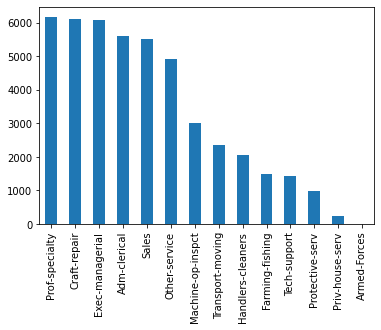

In [11]:
adult['occupation'].value_counts().sort_values(ascending=False).plot.bar()

In [12]:
adult.isna().mean().round(4) * 100

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

In [13]:
adult['workclass'].fillna(adult['workclass'].mode()[0], inplace=True)
adult['native-country'].fillna(adult['native-country'].mode()[0], inplace=True)
adult['occupation'].fillna(adult['occupation'].mode()[0], inplace=True)
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48842 non-null  object 
 1   workclass        48842 non-null  object 
 2   fnlwgt           48842 non-null  float64
 3   education        48842 non-null  object 
 4   educational-num  48842 non-null  float64
 5   marital-status   48842 non-null  object 
 6   occupation       48842 non-null  object 
 7   relationship     48842 non-null  object 
 8   race             48842 non-null  object 
 9   gender           48842 non-null  object 
 10  capital-gain     48842 non-null  float64
 11  capital-loss     48842 non-null  float64
 12  hours-per-week   48842 non-null  float64
 13  native-country   48842 non-null  object 
 14  income           48842 non-null  object 
dtypes: float64(5), object(10)
memory usage: 5.6+ MB


In [14]:
from sklearn.preprocessing import LabelEncoder

cat_vars = [var for var in adult.columns if adult[var].dtypes == 'O']

adult[cat_vars] = adult[cat_vars].astype(str).apply(LabelEncoder().fit_transform)

In [15]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,226802.0,1,7.0,4,6,3,2,1,0.0,0.0,40.0,38,0
1,21,3,89814.0,11,9.0,2,4,0,4,1,0.0,0.0,50.0,38,0
2,11,1,336951.0,7,12.0,2,10,0,4,1,0.0,0.0,40.0,38,1
3,27,3,160323.0,15,10.0,2,6,0,2,1,7688.0,0.0,40.0,38,1
4,1,3,103497.0,15,10.0,4,9,3,4,0,0.0,0.0,30.0,38,0


In [16]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48842 non-null  int64  
 1   workclass        48842 non-null  int64  
 2   fnlwgt           48842 non-null  float64
 3   education        48842 non-null  int64  
 4   educational-num  48842 non-null  float64
 5   marital-status   48842 non-null  int64  
 6   occupation       48842 non-null  int64  
 7   relationship     48842 non-null  int64  
 8   race             48842 non-null  int64  
 9   gender           48842 non-null  int64  
 10  capital-gain     48842 non-null  float64
 11  capital-loss     48842 non-null  float64
 12  hours-per-week   48842 non-null  float64
 13  native-country   48842 non-null  int64  
 14  income           48842 non-null  int64  
dtypes: float64(5), int64(10)
memory usage: 5.6 MB


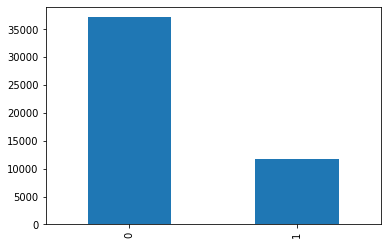

In [17]:
adult.income.value_counts().plot.bar()

In [18]:
from sklearn.model_selection import train_test_split
X = adult.drop(columns=['income'])
y = adult.income

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39073, 14), (9769, 14), (39073,), (9769,))

In [20]:
## Training our classifiers

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

ESTIMATORS = 200

tree_clf = DecisionTreeClassifier(random_state = RANDOM_STATE).fit(X_train, y_train)

bagging_clf = BaggingClassifier(random_state= RANDOM_STATE, base_estimator= DecisionTreeClassifier(random_state= RANDOM_STATE),
                                n_estimators= ESTIMATORS).fit(X_train, y_train)

random_forest_clf = RandomForestClassifier(n_estimators = ESTIMATORS, random_state = RANDOM_STATE).fit(X_train, y_train)


In [21]:
# Check f1 score of above models

from sklearn.metrics import f1_score

models = [tree_clf]
classifier_names = ['Decision Tree', 'Bagging Classifier', 'Random Forest Classifier']
train_f1_scores = []
test_f1_scores = []

for model in models:
  y_pred_train = model.predict(X_train)
  train_f1_score = f1_score(y_pred_train, y_train)
  train_f1_scores.append(train_f1_scores)

  y_pred = model.predict(X_test)
  test_f1_scores.append(f1_score(y_pred, y_test))

train_f1_score = [np.round(i*100, 2) for i in train_f1_scores]
test_f1_score = [np.round(i*100, 2) for i in test_f1_scores]

performance_dict = {
    'Classifier Name': classifier_names,
    'Train f1_score (%)': train_f1_scores,
    'Test f1_score(%)': test_f1_scores
}

df = pd.DataFrame.from_dict(performance_dict)
df

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from nested sequences exceeding the maximum number of dimensions of 32 is deprecated. If you mean to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


TypeError: ignored